# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Load and display the data

In [2]:
#your code here
df = pd.read_csv('/content/Tweets.csv')
df

created_at            id        id_str  \
0      Tue Jul 31 13:34:34 +0000 2018  1.024290e+18  1.024290e+18   
1      Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
2      Tue Jul 31 13:34:40 +0000 2018  1.024290e+18  1.024290e+18   
3      Tue Jul 31 13:34:27 +0000 2018  1.024290e+18  1.024290e+18   
4      Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   
...                               ...           ...           ...   
11094  Tue Jul 31 13:34:36 +0000 2018  1.024290e+18  1.024290e+18   
11095  Tue Jul 31 13:34:15 +0000 2018  1.024290e+18  1.024290e+18   
11096  Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
11097  Tue Jul 31 13:34:35 +0000 2018  1.024290e+18  1.024290e+18   
11098  Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   

                                                    text  truncated  \
0      RT @EdwardTHardy: The 7th US Circuit Court of ...      False   
1      RT @VenomMovie: The world has enough superhero...      False   
2      RT @FutbolBible: Teachers vs Students match &a...      False   
3      RT @mashable: Someone from 'The Office' actual...      False   
4      RT @_missj0hnson: Iâ€™m at Starbucks asking fo...      False   
...                                                  ...        ...   
11094  RT @AnnieOakley2015: @AVoiceForAllGA Following...      False   
11095  RT @BillOReilly: What exactly is Donald Trump ...      False   
11096  Paradoxically, your good intentions may stand ...      False   
11097  RT @enblocibc: Less than 4 days to go for the ...      False   
11098  The nature of being human is to be wired for c...      False   

                                                entities  \
0      {'hashtags': [], 'symbols': [], 'user_mentions...   
1      {'hashtags': [{'text': 'Venom', 'indices': [64...   
2      {'hashtags': [], 'symbols': [], 'user_mentions...   
3      {'hashtags': [], 'symbols': [], 'user_mentions...   
4      {'hashtags': [], 'symbols': [], 'user_mentions...   
...                                                  ...   
11094  {'hashtags': [{'text': 'GA10', 'indices': [93,...   
11095  {'hashtags': [], 'symbols': [], 'user_mentions...   
11096  {'hashtags': [], 'symbols': [], 'user_mentions...   
11097  {'hashtags': [], 'symbols': [], 'user_mentions...   
11098  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                metadata  \
0      {'iso_language_code': 'en', 'result_type': 're...   
1      {'iso_language_code': 'en', 'result_type': 're...   
2      {'iso_language_code': 'en', 'result_type': 're...   
3      {'iso_language_code': 'en', 'result_type': 're...   
4      {'iso_language_code': 'en', 'result_type': 're...   
...                                                  ...   
11094  {'iso_language_code': 'en', 'result_type': 're...   
11095  {'iso_language_code': 'en', 'result_type': 're...   
11096  {'iso_language_code': 'en', 'result_type': 're...   
11097  {'iso_language_code': 'en', 'result_type': 're...   
11098  {'iso_language_code': 'en', 'result_type': 're...   

                                                  source  is_quote_status  \
0      <a href="http://twitter.com/download/android" ...            False   
1      <a href="http://twitter.com/download/android" ...            False   
2      <a href="http://twitter.com/download/iphone" r...            False   
3      <a href="http://twitter.com" rel="nofollow">Tw...            False   
4      <a href="http://twitter.com/download/android" ...            False   
...                                                  ...              ...   
11094  <a href="http://twitter.com/download/android" ...            False   
11095  <a href="http://twitter.com/download/iphone" r...            False   
11096  <a href="http://www.twittascope.com" rel="nofo...            False   
11097  <a href="http://twitter.com/download/android" ...            False   
11098  <a href="http://www.twittascope.com" rel="nofo...

In [3]:
df_truth = pd.read_csv('/content/ground_truth.csv')
df_truth.columns = ['Ground Truth']
df_truth['Ground Truth'] = df_truth['Ground Truth'].astype('int')
df_truth

Ground Truth
0                 0
1                 0
2                 1
3                 0
4                 1
...             ...
11094             0
11095             1
11096             0
11097             0
11098             0

[11099 rows x 1 columns]

## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   created_at             11099 non-null  object 
 1   id                     11099 non-null  float64
 2   id_str                 11099 non-null  float64
 3   text                   11099 non-null  object 
 4   truncated              11099 non-null  bool   
 5   entities               11099 non-null  object 
 6   metadata               11099 non-null  object 
 7   source                 11099 non-null  object 
 8   is_quote_status        11099 non-null  bool   
 9   retweet_count          11099 non-null  int64  
 10  favorite_count         11099 non-null  int64  
 11  lang                   11099 non-null  object 
 12  user_name              11099 non-null  object 
 13  user_screen_name       11099 non-null  object 
 14  user_followers_count   11099 non-null  int64  
 15  us

In [5]:
df.describe()

id        id_str  retweet_count  favorite_count  \
count  1.109900e+04  1.109900e+04   11099.000000    11099.000000   
mean   1.024290e+18  1.024290e+18    2777.956392        0.039463   
std    0.000000e+00  0.000000e+00   12180.169923        1.013902   
min    1.024290e+18  1.024290e+18       0.000000        0.000000   
25%    1.024290e+18  1.024290e+18       0.000000        0.000000   
50%    1.024290e+18  1.024290e+18      13.000000        0.000000   
75%    1.024290e+18  1.024290e+18     428.500000        0.000000   
max    1.024290e+18  1.024290e+18  413719.000000      101.000000   

       user_followers_count  user_friends_count  user_listed_count  \
count          1.109900e+04        11099.000000       11099.000000   
mean           6.009168e+03         1442.336337          47.017479   
std            2.013144e+05         7645.949991         254.953725   
min            0.000000e+00            0.000000           0.000000   
25%            1.310000e+02          194.000000           0.000000   
50%            4.030000e+02          442.000000           3.000000   
75%            1.249000e+03         1116.000000          19.000000   
max            2.021186e+07       510292.000000       12895.000000   

       user_favourites_count  user_statuses_count  
count           11099.000000         1.109900e+04  
mean            19413.978286         3.476254e+04  
std             39144.906425         8.879138e+04  
min                 0.000000         1.000000e+00  
25%              1052.000000         2.543000e+03  
50%              5538.000000         9.943000e+03  
75%             19576.500000         3.418700e+04  
max            635920.000000         2.848360e+06

In [6]:
# your code here
df.dropna(inplace = True) # none found
x = df.duplicated()
for i in x:
    if(int(i) == 1):
        print(i) # no duplicates found

### Adding new columns

In [7]:
df['entities'] = df['entities'].apply(lambda x: eval(x))
# print(df['entities'][0].keys(), df['entities'][0].values())
hashtags = list()
for i in df['entities']:
    hashtags.append(len(i['hashtags']))
    
df['hashtags'] = hashtags
df

created_at            id        id_str  \
0      Tue Jul 31 13:34:34 +0000 2018  1.024290e+18  1.024290e+18   
1      Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
2      Tue Jul 31 13:34:40 +0000 2018  1.024290e+18  1.024290e+18   
3      Tue Jul 31 13:34:27 +0000 2018  1.024290e+18  1.024290e+18   
4      Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   
...                               ...           ...           ...   
11094  Tue Jul 31 13:34:36 +0000 2018  1.024290e+18  1.024290e+18   
11095  Tue Jul 31 13:34:15 +0000 2018  1.024290e+18  1.024290e+18   
11096  Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
11097  Tue Jul 31 13:34:35 +0000 2018  1.024290e+18  1.024290e+18   
11098  Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   

                                                    text  truncated  \
0      RT @EdwardTHardy: The 7th US Circuit Court of ...      False   
1      RT @VenomMovie: The world has enough superhero...      False   
2      RT @FutbolBible: Teachers vs Students match &a...      False   
3      RT @mashable: Someone from 'The Office' actual...      False   
4      RT @_missj0hnson: Iâ€™m at Starbucks asking fo...      False   
...                                                  ...        ...   
11094  RT @AnnieOakley2015: @AVoiceForAllGA Following...      False   
11095  RT @BillOReilly: What exactly is Donald Trump ...      False   
11096  Paradoxically, your good intentions may stand ...      False   
11097  RT @enblocibc: Less than 4 days to go for the ...      False   
11098  The nature of being human is to be wired for c...      False   

                                                entities  \
0      {'hashtags': [], 'symbols': [], 'user_mentions...   
1      {'hashtags': [{'text': 'Venom', 'indices': [64...   
2      {'hashtags': [], 'symbols': [], 'user_mentions...   
3      {'hashtags': [], 'symbols': [], 'user_mentions...   
4      {'hashtags': [], 'symbols': [], 'user_mentions...   
...                                                  ...   
11094  {'hashtags': [{'text': 'GA10', 'indices': [93,...   
11095  {'hashtags': [], 'symbols': [], 'user_mentions...   
11096  {'hashtags': [], 'symbols': [], 'user_mentions...   
11097  {'hashtags': [], 'symbols': [], 'user_mentions...   
11098  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                metadata  \
0      {'iso_language_code': 'en', 'result_type': 're...   
1      {'iso_language_code': 'en', 'result_type': 're...   
2      {'iso_language_code': 'en', 'result_type': 're...   
3      {'iso_language_code': 'en', 'result_type': 're...   
4      {'iso_language_code': 'en', 'result_type': 're...   
...                                                  ...   
11094  {'iso_language_code': 'en', 'result_type': 're...   
11095  {'iso_language_code': 'en', 'result_type': 're...   
11096  {'iso_language_code': 'en', 'result_type': 're...   
11097  {'iso_language_code': 'en', 'result_type': 're...   
11098  {'iso_language_code': 'en', 'result_type': 're...   

                                                  source  is_quote_status  \
0      <a href="http://twitter.com/download/android" ...            False   
1      <a href="http://twitter.com/download/android" ...            False   
2      <a href="http://twitter.com/download/iphone" r...            False   
3      <a href="http://twitter.com" rel="nofollow">Tw...            False   
4      <a href="http://twitter.com/download/android" ...            False   
...                                                  ...              ...   
11094  <a href="http://twitter.com/download/android" ...            False   
11095  <a href="http://twitter.com/download/iphone" r...            False   
11096  <a href="http://www.twittascope.com" rel="nofo...            False   
11097  <a href="http://twitter.com/download/android" ...            False   
11098  <a href="http://www.twittascope.com" rel="nofo...

In [8]:
df['metadata'] = df['metadata'].apply(lambda x: eval(x))
metadata = df['metadata']
print(metadata[0].keys())
print(metadata[0].values())
# iso_language_code is same as lang column

dict_keys(['iso_language_code', 'result_type'])
dict_values(['en', 'recent'])


In [9]:
d_lang = dict()
for i in df['lang']:
    if i not in d_lang.keys():
        d_lang[i] = 1
    else:
        d_lang[i] += 1
        
# print(d_lang)
lang_mod = []
for i in df['lang']:
    lang_mod.append(d_lang[i])

df['lang_mod'] = lang_mod
df

created_at            id        id_str  \
0      Tue Jul 31 13:34:34 +0000 2018  1.024290e+18  1.024290e+18   
1      Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
2      Tue Jul 31 13:34:40 +0000 2018  1.024290e+18  1.024290e+18   
3      Tue Jul 31 13:34:27 +0000 2018  1.024290e+18  1.024290e+18   
4      Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   
...                               ...           ...           ...   
11094  Tue Jul 31 13:34:36 +0000 2018  1.024290e+18  1.024290e+18   
11095  Tue Jul 31 13:34:15 +0000 2018  1.024290e+18  1.024290e+18   
11096  Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
11097  Tue Jul 31 13:34:35 +0000 2018  1.024290e+18  1.024290e+18   
11098  Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   

                                                    text  truncated  \
0      RT @EdwardTHardy: The 7th US Circuit Court of ...      False   
1      RT @VenomMovie: The world has enough superhero...      False   
2      RT @FutbolBible: Teachers vs Students match &a...      False   
3      RT @mashable: Someone from 'The Office' actual...      False   
4      RT @_missj0hnson: Iâ€™m at Starbucks asking fo...      False   
...                                                  ...        ...   
11094  RT @AnnieOakley2015: @AVoiceForAllGA Following...      False   
11095  RT @BillOReilly: What exactly is Donald Trump ...      False   
11096  Paradoxically, your good intentions may stand ...      False   
11097  RT @enblocibc: Less than 4 days to go for the ...      False   
11098  The nature of being human is to be wired for c...      False   

                                                entities  \
0      {'hashtags': [], 'symbols': [], 'user_mentions...   
1      {'hashtags': [{'text': 'Venom', 'indices': [64...   
2      {'hashtags': [], 'symbols': [], 'user_mentions...   
3      {'hashtags': [], 'symbols': [], 'user_mentions...   
4      {'hashtags': [], 'symbols': [], 'user_mentions...   
...                                                  ...   
11094  {'hashtags': [{'text': 'GA10', 'indices': [93,...   
11095  {'hashtags': [], 'symbols': [], 'user_mentions...   
11096  {'hashtags': [], 'symbols': [], 'user_mentions...   
11097  {'hashtags': [], 'symbols': [], 'user_mentions...   
11098  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                metadata  \
0      {'iso_language_code': 'en', 'result_type': 're...   
1      {'iso_language_code': 'en', 'result_type': 're...   
2      {'iso_language_code': 'en', 'result_type': 're...   
3      {'iso_language_code': 'en', 'result_type': 're...   
4      {'iso_language_code': 'en', 'result_type': 're...   
...                                                  ...   
11094  {'iso_language_code': 'en', 'result_type': 're...   
11095  {'iso_language_code': 'en', 'result_type': 're...   
11096  {'iso_language_code': 'en', 'result_type': 're...   
11097  {'iso_language_code': 'en', 'result_type': 're...   
11098  {'iso_language_code': 'en', 'result_type': 're...   

                                                  source  is_quote_status  \
0      <a href="http://twitter.com/download/android" ...            False   
1      <a href="http://twitter.com/download/android" ...            False   
2      <a href="http://twitter.com/download/iphone" r...            False   
3      <a href="http://twitter.com" rel="nofollow">Tw...            False   
4      <a href="http://twitter.com/download/android" ...            False   
...                                                  ...              ...   
11094  <a href="http://twitter.com/download/android" ...            False   
11095  <a href="http://twitter.com/download/iphone" r...            False   
11096  <a href="http://www.twittascope.com" rel="nofo...            False   
11097  <a href="http://twitter.com/download/android" ...            False   
11098  <a href="http://www.twittascope.com" rel="nofo...

In [10]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'is_quote_status', 'retweet_count',
       'favorite_count', 'lang', 'user_name', 'user_screen_name',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at', 'user_favourites_count', 'user_verified',
       'user_statuses_count', 'hashtags', 'lang_mod'],
      dtype='object')

In [11]:
df['user_verified'] = df['user_verified'].apply(lambda x: x*1000)

## Part-1
*Vectorize tweets using only meta data*

In [12]:
def get_features(df, df_truth):
    """
    Function to return a matrix of dimensions (number of tweets, number of chosen features)
    Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
    """

    # your code here
    new_df = df.drop(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'lang', 'user_name', 'user_screen_name', 'user_created_at'], axis=1)
    print(new_df.columns)
    x = new_df.to_numpy()
    y = df_truth.to_numpy()
    return x,y
    
    
X,y = get_features(df, df_truth)
print(X[0])
print(y[1])

Index(['is_quote_status', 'retweet_count', 'favorite_count',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_favourites_count', 'user_verified', 'user_statuses_count',
       'hashtags', 'lang_mod'],
      dtype='object')
[False 113 0 153 264 7 32984 0 31308 0 10623]
[0]


In [13]:
print(len(X), len(y))

11099 11099


Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [14]:
# your code here
X = normalize(X)
X

array([[0.00000000e+00, 2.41958973e-03, 0.00000000e+00, ...,
        6.70376242e-01, 0.00000000e+00, 2.27462847e-01],
       [0.00000000e+00, 6.67883241e-02, 0.00000000e+00, ...,
        9.87589058e-01, 1.13162189e-05, 1.20212194e-01],
       [0.00000000e+00, 2.96590954e-01, 0.00000000e+00, ...,
        1.37089170e-01, 0.00000000e+00, 8.41304594e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.72530266e-01, 0.00000000e+00, 9.27875502e-01],
       [0.00000000e+00, 7.68369196e-04, 0.00000000e+00, ...,
        5.80716363e-01, 0.00000000e+00, 4.53465887e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.95474413e-01, 0.00000000e+00, 6.04458132e-01]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))
# print(X_test)

8879 2220


### KNN from scratch without using any libraries

In [16]:
class KNN():
    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p
        
    def distance(self, point):
        # return top k least distances of given point from all the points
        arr = list()
        for i in range(len(self.X)):
          dist = sum(abs(self.X[i] - point)**self.p)
          dist = dist**(1/self.p)
          arr.append([i,dist])
          
        arr = sorted(arr, key = lambda x: x[1])
        return arr[0:self.k]
    
    def classifier(self, arr):
        class_arr = [y_train[i[0]][0] for i in arr]
        return Counter(class_arr).most_common(1)[0][0]
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X):
        y_pred = np.empty(X.shape[0])
        
        for ind, i in enumerate(X):
            arr = self.distance(i)
            y_pred[ind] = self.classifier(arr)
            if(ind % 100 == 0):
                print(ind)
        return y_pred            

In [ ]:
knn = KNN(k=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


0.9207207207207208

### KNN using Nearest Neighbours

In [17]:
from sklearn.neighbors import NearestNeighbors
class KNN2():
  def __init__(self, k = 3):
    self.k = k

  def predict(self):
    nbrs = NearestNeighbors(n_neighbors=self.k).fit(self.X_train)
    distances, indices = nbrs.kneighbors(self.X_test)
    y_pred = list()
    for index in indices:
      class_arr = [self.y_train[i][0] for i in index]
      y_pred.append(Counter(class_arr).most_common(1)[0][0])
    return y_pred

  def fit(self, X_train, y_train, X_test, y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test

In [18]:
knn = KNN2(k=5)
knn.fit(X_train, y_train, X_test, y_test)

y_pred = knn.predict()
acc = accuracy_score(y_test, y_pred)
acc

0.9585585585585585

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2004,   42],
       [  50,  124]])

### experimenting for different values of k

Max accuracy is 0.9585585585585585 for k-value 5



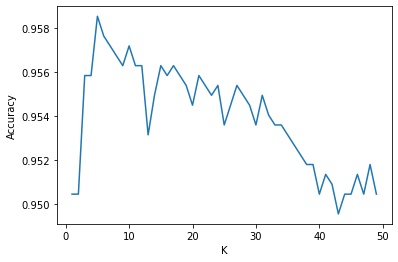

In [20]:
k = np.arange(1,50)
accuracy = list()
max = [0,0]
for i in k:
    knn = KNN2(k = i)
    knn.fit(X_train, y_train, X_test, y_test)
    y_pred = knn.predict()
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    if acc > max[0]:
      max[0] = acc
      max[1] = i

print(f"Max accuracy is {max[0]} for k-value {max[1]}\n")   
plt.plot(k, accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [22]:
!pip install PyStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyStemmer: filename=PyStemmer-2.2.0.1-cp38-cp38-linux_x86_64.whl size=599539 sha256=e34946e21bdce5f890393e881fcf3a26e5c949417e88ff99d6995910b4539984
  Stored in directory: /root/.cache/pip/wheels/78/04/32/a81f10f01775fcadba622dbcf8305f8053ab1db21b20a25fc4
Successfully built PyStemmer


In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from Stemmer import Stemmer
import re

try:
    nltk.download('stopwords')
except:
    pass
stop_words = set(stopwords.words('english'))
stop_words.add('rt')
stemmer = Stemmer('porter')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
def tokenise(text):
    text = text.lower()
    text = re.sub(r'&nbsp;|&lt;|&gt;|&amp;|&quot;|&apos;', r' ', text) # removing html entities
    text = re.sub(r'http[s]?\S*[\s | \n]', r' ', text) # removing links
    text = re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",text) # removing tags and hashtags
    text = re.split(r'[^A-Za-z0-9]+', text)
    final = ''
    for i in text:
        word = stemmer.stemWord(i)
        if word not in stop_words:
            word += ' '
            final += word
    return final

In [25]:
from math import log2
from collections import defaultdict
from sklearn.decomposition import PCA

def BoW(tweets):
    d = dict()
    l = len(tweets)
    for ind, words in enumerate(tweets):
        words = re.split(r'[^A-Za-z0-9]+', words)
        for i in words:
            if i not in d.keys():
                d[i] = set()
            d[i].add(ind)
    for i in d.keys():
        d[i] = log2(l / len(d[i]))
    word_set = list(d.keys())
    return d, word_set

def tdf(tweets, word_set):
    x = list()
    d = dict()
    for i in word_set:
        d[i] = 0
    for ind, words in enumerate(tweets):
        words = re.split(r'[^A-Za-z0-9]+', words)
        for i in words:
            d[i] += 1
        d = {k: v / total for total in (sum(d.values(), 0.0),) for k,v in d.items()}
        x.append(list(d.values()))
        d = d.fromkeys(d, 0)
    return x

def tf_idf(word_docs, tdf_arr, word_set):
    for ind, doc in enumerate(tdf_arr):
        for ind2, word in enumerate(doc):
            if word != 0:
                idf = word_docs[word_set[ind2]]
                tdf_arr[ind][ind2] *= idf
        if(ind %100 == 0):
          print(ind)
            
    return tdf_arr

In [26]:
def tweet_vectoriser(tweets):
    """
    Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
    Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
    Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
    """
    # your code here
    for ind, i in enumerate(tweets): # tokenise
        i = tokenise(i)
        tweets[ind] = i
        
    word_docs, word_set = BoW(tweets)
    
    tdf_arr = tdf(tweets, word_set)
    tdf_arr = tf_idf(word_docs, tdf_arr, word_set)
#     final_vector = list()
#     for ind, i in enumerate(tdf_arr):
#         final_vector.append(list(i.values()))
        
#     return np.array(tdf_arr)
    return tdf_arr
        
    

tweets = df['text'].to_list()

# print(tweets[:10], end = '\n\n')
tdf_arr = tweet_vectoriser(tweets)
# final_vector = tweet_vectoriser(tweets)
# final_vector[:5]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000


In [27]:
print(len(tdf_arr))

11099


Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [28]:
# your code here
from sklearn.decomposition import PCA
tdf_arr = np.array(tdf_arr)
y = df_truth.to_numpy()
tdf_arr = normalize(tdf_arr)

# dimensionality reduction6
pca = PCA(n_components=25)
pca.fit(tdf_arr)
tdf_arr = pca.transform(tdf_arr)
print(tdf_arr.shape)

(11099, 25)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(tdf_arr, y, test_size=0.2, random_state=37)
print(len(X_train), len(X_test))

8879 2220


In [30]:
knn = KNN2(k=6)
knn.fit(X_train, y_train,X_test, y_test)

y_pred = knn.predict()
acc = accuracy_score(y_test, y_pred)
acc

0.9342342342342342

In [31]:
confusion_matrix(y_test, y_pred)

array([[2003,   41],
       [ 105,   71]])

### experimenting for different values of k

Max accuracy is 0.9342342342342342 for k-value 6



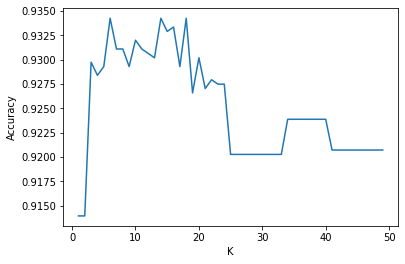

In [32]:
k = np.arange(1,50)
accuracy = list()
max = [0,0]
for i in k:
    knn = KNN2(k = i)
    knn.fit(X_train, y_train, X_test, y_test)
    y_pred = knn.predict()
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    if acc > max[0]:
      max[0] = acc
      max[1] = i

print(f"Max accuracy is {max[0]} for k-value {max[1]}\n")    
plt.plot(k, accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [33]:
# your code here
X

array([[0.00000000e+00, 2.41958973e-03, 0.00000000e+00, ...,
        6.70376242e-01, 0.00000000e+00, 2.27462847e-01],
       [0.00000000e+00, 6.67883241e-02, 0.00000000e+00, ...,
        9.87589058e-01, 1.13162189e-05, 1.20212194e-01],
       [0.00000000e+00, 2.96590954e-01, 0.00000000e+00, ...,
        1.37089170e-01, 0.00000000e+00, 8.41304594e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.72530266e-01, 0.00000000e+00, 9.27875502e-01],
       [0.00000000e+00, 7.68369196e-04, 0.00000000e+00, ...,
        5.80716363e-01, 0.00000000e+00, 4.53465887e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.95474413e-01, 0.00000000e+00, 6.04458132e-01]])

In [34]:
tdf_arr

array([[-1.27598387e-02, -8.63982968e-03, -2.48087877e-03, ...,
         7.07152319e-03, -1.97710093e-02, -2.13165294e-02],
       [ 9.77239914e-01,  5.24833247e-02,  2.42180944e-02, ...,
        -4.86543524e-03,  7.94347806e-04, -6.24425754e-03],
       [-1.08076390e-02, -1.09609960e-02, -6.01636897e-03, ...,
         7.17505718e-03, -2.33420571e-02,  1.28669940e-03],
       ...,
       [-7.16952174e-02,  9.84767608e-01,  3.25895828e-02, ...,
         2.86220162e-03, -1.00045046e-02, -6.65215951e-03],
       [ 4.62545624e-02, -7.19392654e-03, -5.60804494e-03, ...,
         1.84116930e-02, -2.76355664e-02, -4.04446977e-02],
       [-2.58806599e-02, -2.54347479e-02, -5.52825183e-03, ...,
         3.53689486e-03, -4.08689549e-03,  7.10776369e-03]])

In [35]:
X = np.concatenate((X, tdf_arr), axis=1)

In [36]:
print(X.shape)

(11099, 36)


Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [37]:
# your code here
X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

8879 2220


In [41]:
knn = KNN2(k=9)
knn.fit(X_train, y_train, X_test, y_test)

y_pred = knn.predict()
acc = accuracy_score(y_test, y_pred)
acc

0.9603603603603603

In [42]:
confusion_matrix(y_test, y_pred)

array([[2016,   30],
       [  58,  116]])

### experimenting with values of k

Max accuracy is 0.9603603603603603 for k-value 9



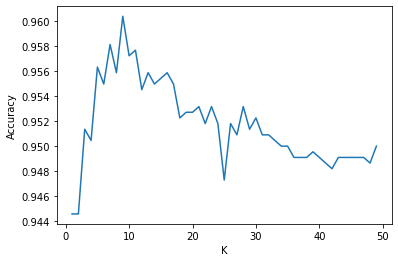

In [40]:
k = np.arange(1,50)
accuracy = list()
max = [0,0]
for i in k:
    knn = KNN2(k = i)
    knn.fit(X_train, y_train, X_test, y_test)
    y_pred = knn.predict()
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    if acc > max[0]:
      max[0] = acc
      max[1] = i

print(f"Max accuracy is {max[0]} for k-value {max[1]}\n")    
plt.plot(k, accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

#### Part 1: Features as Tweet Metadata
Max accuracy: 95.85%

#### Part 2: Text as features
Max Accuracy: 93.42%

#### Part 3: Combining part 1 and 2
Max accuracy: 96.03%

We notice that accuracy in part 2 drops significantly as compared to part 1, mainly because we are performing dimensionality reduction in the 2nd part. On reducing the dimensionality, there is some information that is lost in the process, and thus our accuracy drops. Now, for part 3, we combine the features of part 1 (11) and part 2 (20). Therefore, our initial guess would be expect a significant improvement in the algorithm. However, we notice that there is only a very slight improvement. A possible reason of this is that the tf-idf algorithm does not capture the semantic meaning of the tweets and hence might not be a good indicator of whether the tweet will be popular or not. Therefore, it does not end up improving our KNN classifier that much.